In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import NaN, nan, NAN
from scipy import stats
import statsmodels.api as sm

# Register matplotlib converters for pandas
pd.plotting.register_matplotlib_converters()

# Ignore warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv('/content/messy_data.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,policy_number,comments
0,19,female,27.900,0,YES,southwest,16884.924,OXVEXZRG,Needs follow-up
1,18,male,33.770,1,NO,southeast,1725.5523,SV404VGH,Check payment history
2,28,male,33.000,3,no,southeast,$4449.462,49AZESV0,NaN
3,33,male,22.705,0,no,northwest,$21984.47061,HOI5LI0C,Smoking habits unclear
4,32,male,28.880,0,NO,northwest,$3866.8552,QB72JZ5L,Family history of diabetes


In [3]:
# General information about the DataFrame
print("----------General information----------")
print(df.info())
print("----------Shape----------")
print(df.shape)
print("----------Summary----------")
# Statistical summary of numerical columns
print(df.describe())
print("----------Missing values----------")
# Check for missing values in the dataset
print(df.isnull().sum())
print("----------Duplicate values----------")
# Check for duplicates
print(df.duplicated().sum())


----------General information----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1340 non-null   int64  
 1   sex            1340 non-null   object 
 2   bmi            1338 non-null   float64
 3   children       1340 non-null   int64  
 4   smoker         1340 non-null   object 
 5   region         1340 non-null   object 
 6   charges        1340 non-null   object 
 7   policy_number  1340 non-null   object 
 8   comments       1072 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 94.3+ KB
None
----------Shape----------
(1340, 9)
----------Summary----------
               age          bmi     children
count  1340.000000  1338.000000  1340.000000
mean     39.176119    30.667242     1.094030
std      14.062233     6.096898     1.204966
min      18.000000    15.960000     0.000000
25%      26.0

In [4]:

# Step 1: Remove extra spaces from text columns
df['sex'] = df['sex'].str.strip()
df['region'] = df['region'].str.strip()
df['smoker'] = df['smoker'].str.strip()

# Step 2: Change the case of relevant text columns to lowercase
df['sex'] = df['sex'].str.lower()
df['region'] = df['region'].str.lower()
df['smoker'] = df['smoker'].str.lower()

# Step 3: Replace missing values in numerical columns with the mean

# Remove any non-numeric characters (e.g., $ or commas) in 'charges'
df['charges'] = df['charges'].replace({'\$': '', ',': ''}, regex=True)
# Convert 'charges' to numeric values (to handle cases where there are any issues with non-numeric characters)
df['charges'] = pd.to_numeric(df['charges'], errors='coerce')

# Round 'charges' to two decimal places
df['charges'] = df['charges'].round(2)


# Convert 'charges' and 'bmi' to numeric values (forcing errors to NaN)
df['charges'] = pd.to_numeric(df['charges'], errors='coerce')
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')

# Replace missing values in numeric columns with the mean
df['charges'] = df['charges'].fillna(df['charges'].mean())
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# Step 4: Drop irrelevant columns (example: 'policy_number', 'comments')
df = df.drop(columns=['policy_number', 'comments'], errors='ignore')

# General information about the DataFrame
print("----------General information----------")
print(df.info())
print("----------Shape----------")
print(df.shape)
print("----------Summary----------")
# Statistical summary of numerical columns
print(df.describe())
print("----------Missing values----------")
# Check for missing values in the dataset
print(df.isnull().sum())
print("----------Duplicate values----------")
# Check for duplicates
print(df.duplicated().sum())

# Check for duplicates based on all columns
duplicates = df[df.duplicated()]
print("Duplicate values:\n", duplicates)





----------General information----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1340 non-null   int64  
 1   sex       1340 non-null   object 
 2   bmi       1340 non-null   float64
 3   children  1340 non-null   int64  
 4   smoker    1340 non-null   object 
 5   region    1340 non-null   object 
 6   charges   1340 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.4+ KB
None
----------Shape----------
(1340, 7)
----------Summary----------
               age          bmi     children       charges
count  1340.000000  1340.000000  1340.000000   1340.000000
mean     39.176119    30.667242     1.094030  13264.504090
std      14.062233     6.092343     1.204966  12105.477563
min      18.000000    15.960000     0.000000   1121.870000
25%      26.000000    26.315000     0.000000   4733.637500
50%      39.00000

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92
1,18,male,33.770,1,no,southeast,1725.55
2,28,male,33.000,3,no,southeast,4449.46
3,33,male,22.705,0,no,northwest,21984.47
4,32,male,28.880,0,no,northwest,3866.86


#Summary and distribution of categorical variables: 'sex','smoker','region' and 'children'

In [6]:
# Pie Chart Function for Categorical Variables

import seaborn as sns

# Create a function that returns a Pie chart for a categorical variable
def pie_chart(x='smoker'):
    """Function creates a Pie chart for categorical variables."""

    # Create a figure with specified size and subplot aspect as 'equal'
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

    # Group the dataframe by the specified column and calculate the size of each group
    s = df.groupby(x).size()
    mydata_values = s.values.tolist()  # Extract the counts as a list
    mydata_index = s.index.tolist()   # Extract the category names as a list

    # Generate dynamic colors based on the number of categories
    custom_colors = ['#90EE90', '#FFD580', '#87CEFA', '#FFB6C1']  # Light green, light brown, light blue, light pink

    # Define a helper function to format the percentage and absolute count in the pie chart
    def func(pct, allvals):
        absolute = int(pct / 100. * np.sum(allvals))  # Calculate absolute value
        return "{:.1f}%\n({:d})".format(pct, absolute)  # Format as percentage and count

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(
        mydata_values,  # Values for the pie chart
        autopct=lambda pct: func(pct, mydata_values),  # Format labels with the helper function
        textprops=dict(color="w"),  # Set text color to white
        colors=custom_colors  # Apply custom colors
    )

    # Add a legend to the chart
    ax.legend(
        wedges,  # Pie chart wedges
        mydata_index,  # Category labels
        title="Index",  # Title for the legend
        loc="center left",  # Position the legend on the left
        bbox_to_anchor=(1, 0, 0.5, 1)  # Adjust the bounding box
    )

    # Customize text properties for percentage labels
    plt.setp(autotexts, size=12, weight="bold")

    # Set the title of the pie chart
    ax.set_title(f'{x.capitalize()} Piechart')

    # Display the chart
    plt.show()


#Sex:

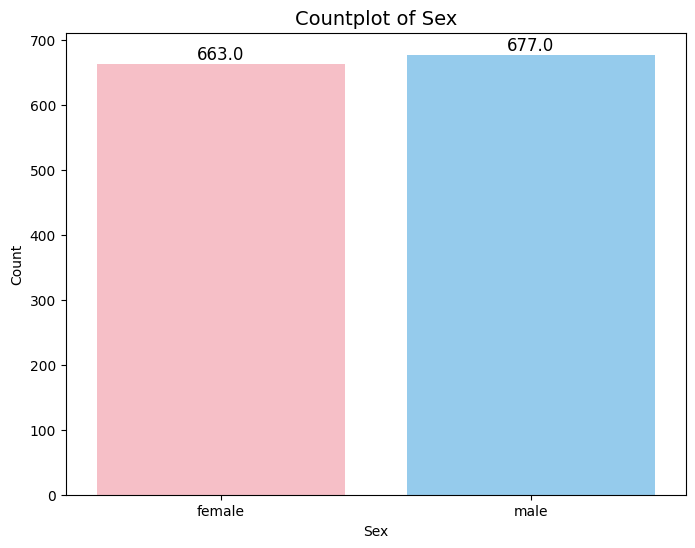

In [7]:
# Create the countplot with light blue
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sex', data=df, palette={'male': '#87CEFA', 'female': '#FFB6C1'})  # Light blue and light salmon

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 7),
                textcoords='offset points')

# Title and display
plt.title('Countplot of Sex', fontsize=14)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


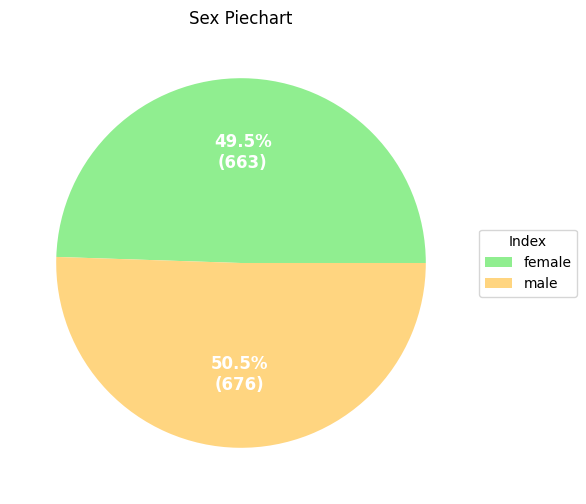

In [8]:
pie_chart('sex')

#Smoker:

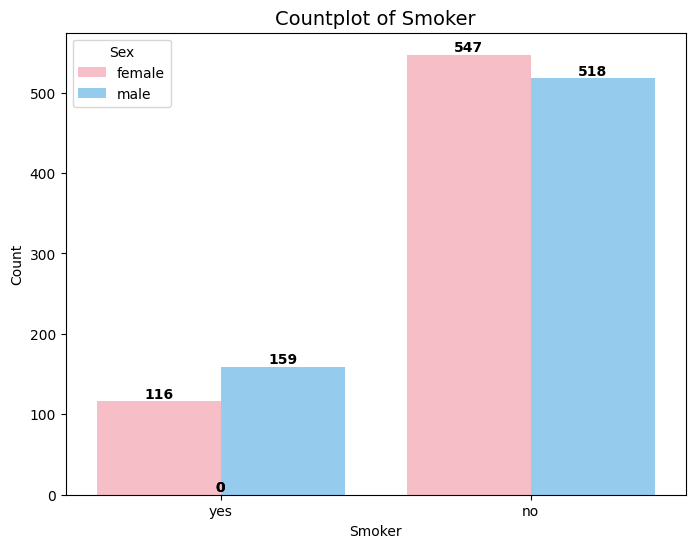

In [9]:
plt.figure(figsize=(8, 6))
plt.title('Countplot of Smoker', fontsize=14)

# Create the countplot
ax = sns.countplot(
    x='smoker',
    hue='sex',
    data=df,
    palette={'male': '#87CEFA', 'female': '#FFB6C1'}
)

# Display counts at the top of the bars
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),  # Display count value
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at top of the bar
        ha='center',
        va='center',
        xytext=(0, 5),  # Offset for text placement
        textcoords='offset points',
        fontsize=10,
        color='black',
        weight='bold'
    )

plt.xlabel('Smoker')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()


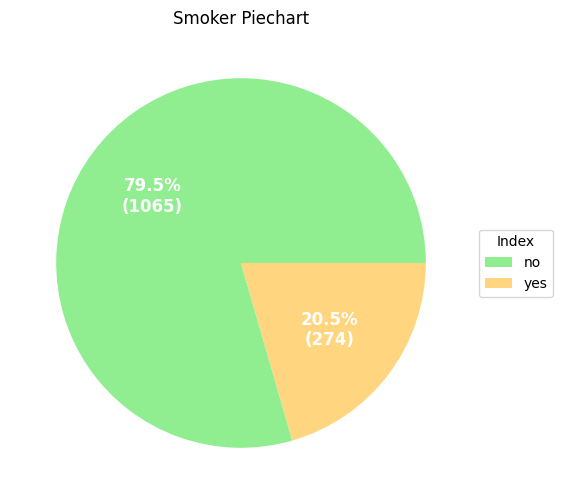

In [10]:
pie_chart('smoker')

#Region:

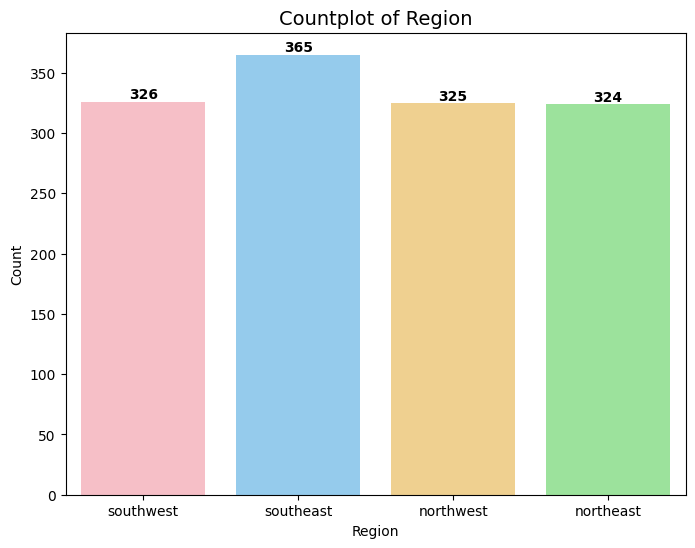

In [11]:
plt.figure(figsize=(8, 6))

# Create the countplot
ax = sns.countplot(
    x='region',
    data=df,
    palette={'southeast': '#87CEFA', 'southwest': '#FFB6C1', 'northeast': '#90EE90', 'northwest': '#FFD580'}
)

# Display counts at the top of the bars
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),  # Display count value
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at top of the bar
        ha='center',
        va='center',
        xytext=(0, 5),  # Offset for text placement
        textcoords='offset points',
        fontsize=10,
        color='black',
        weight='bold'
    )

plt.title('Countplot of Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


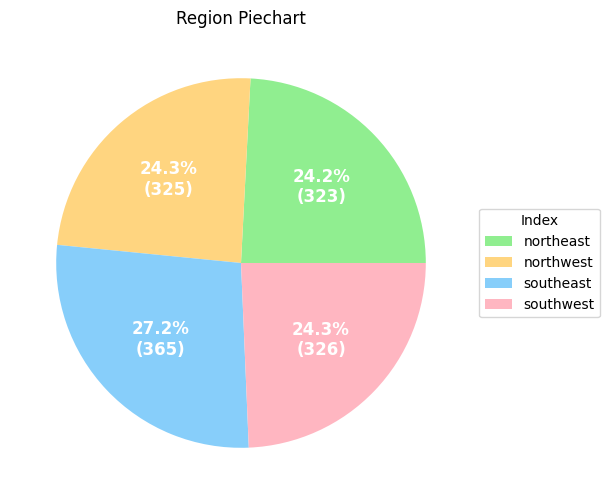

In [12]:
pie_chart('region')

#Number of children:

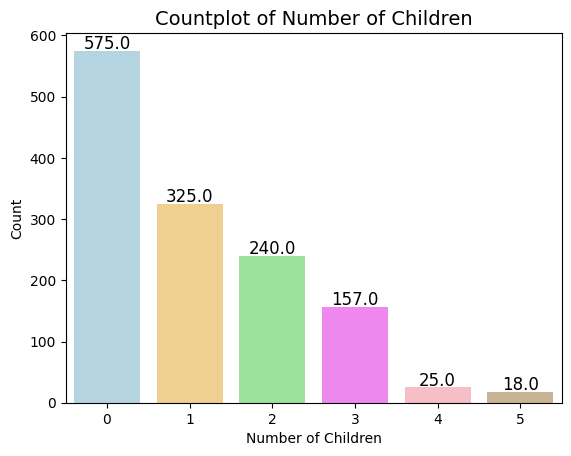

In [13]:


# Define six different light colors
custom_colors = ['#ADD8E6', '#FFD580', '#90EE90', '#FF77FF', '#FFB6C1', '#D2B48C']

# Create the countplot with custom colors
ax = sns.countplot(x='children', data=df, palette=custom_colors)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set title and labels
plt.title('Countplot of Number of Children', fontsize=14)
plt.xlabel('Number of Children')
plt.ylabel('Count')

# Show the plot
plt.show()


#Summary and distribution of Age,BMI and Charges

In [14]:
# Function to Display Summary Statistics and Density Distribution of a Numerical Attribute

def summary(x):
    """
    This function calculates and displays the 5-point summary of a numerical attribute
    and visualizes its density distribution, violin plot, box plot, and cumulative density distribution.

    Parameters:
    x (str): Column name of the numerical attribute in the DataFrame.
    """

    # Calculate 5-point summary statistics
    x_min = df[x].min()  # Minimum value
    x_max = df[x].max()  # Maximum value
    Q1 = df[x].quantile(0.25).round(2)  # First quartile (25th percentile)
    Q2 = df[x].quantile(0.50).round(2)  # Second quartile (Median)
    Q3 = df[x].quantile(0.75).round(2)  # Third quartile (75th percentile)

    # Print the summary statistics
    print(
        f'5-Point Summary of {x.capitalize()} Attribute:\n'
        f'{x.capitalize()} (Min): {x_min}\n'
        f'Q1: {Q1}\n'
        f'Q2 (Median): {Q2}\n'
        f'Q3: {Q3}\n'
        f'{x.capitalize()} (Max): {x_max}'
    )

    # Create a figure with multiple subplots for visualizations
    fig = plt.figure(figsize=(16, 10))  # Set the figure size
    plt.subplots_adjust(hspace=0.6)  # Adjust spacing between subplots
    sns.set_palette('pastel')  # Set color palette for visualizations

    # Plot 1: Density distribution of the attribute
    plt.subplot(221)
    sns.distplot(df[x], color='r')  # Red density plot
    plt.title(f'{x.capitalize()} Density Distribution')  # Add title

    # Plot 2: Violin plot of the attribute
    plt.subplot(222)
    sns.violinplot(x=df[x], palette='Accent')  # Violin plot with "Accent" color palette
    plt.title(f'{x.capitalize()} Violinplot')  # Add title

    # Plot 3: Boxplot of the attribute
    plt.subplot(223)
    sns.boxplot(x=df[x], palette='cool', width=0.7, linewidth=0.6)  # Boxplot with "cool" palette
    plt.title(f'{x.capitalize()} Boxplot')  # Add title

    # Plot 4: Cumulative density distribution
    plt.subplot(224)
    sns.kdeplot(df[x], cumulative=True)  # KDE plot for cumulative density
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')  # Add title

    # Display all the plots
    plt.show()


In [15]:
# Function to Display a Boxplot with Summary Statistics, Skewness, and Outlier Information

def box_plot(x='bmi'):
    """
    This function creates a detailed boxplot for a given numerical attribute, adds key
    summary statistics directly to the plot, calculates skewness, and identifies the number of outliers.

    Parameters:
    x (str): Column name of the numerical attribute in the DataFrame.
    """

    # Function to add values (min, Q1, median, Q3, max) to the boxplot
    def add_values(ax, stats):
        """
        Adds summary statistic values (min, Q1, median, Q3, max) to the boxplot.

        Parameters:
        ax (matplotlib.axes._axes.Axes): The axes object of the plot.
        stats (list): A list of summary statistics [min, Q1, median, Q3, max].
        """

        # Extract and round the statistics
        min_val, Q1, median, Q3, max_val = stats
        min_val, Q1, median, Q3, max_val = round(min_val, 2), round(Q1, 2), round(median, 2), round(Q3, 2), round(max_val, 2)

        # Annotate the boxplot with these values
        ax.text(0.1, min_val, f'{x}(min) : {min_val}', ha='left', va='center', fontsize=12, backgroundcolor='white', color='black', weight='bold')
        ax.text(0.1, Q1, f'Q1 : {Q1}', ha='left', va='center', fontsize=12, backgroundcolor='white', color='black', weight='bold')
        ax.text(0.1, median, f'Q2(Median) : {median}', ha='left', va='center', fontsize=12, backgroundcolor='white', color='black', weight='bold')
        ax.text(0.1, Q3, f'Q3 : {Q3}', ha='left', va='center', fontsize=12, backgroundcolor='white', color='black', weight='bold')
        ax.text(0.1, max_val, f'{x}(max) : {max_val}', ha='left', va='center', fontsize=12, backgroundcolor='white', color='black', weight='bold')

    # Create the boxplot with customized visual properties
    fig, axes = plt.subplots(1, figsize=(8, 6))

    bp_dict = df.boxplot(
        column=x,  # Numerical column for the boxplot
        grid=True,
        figsize=(8, 6),
        ax=axes,
        vert=True,
        notch=True,  # Display notches for confidence intervals
        widths=0.7,
        showmeans=True,
        whis=1.5,
        flierprops={'marker': 'D', 'color': 'red', 'markersize': 10},  # Outlier properties
        boxprops=dict(linewidth=3.0, color='blue'),
        whiskerprops=dict(linewidth=3.0, color='blue'),
        capprops=dict(linewidth=3.0, color='blue'),
        medianprops=dict(linewidth=3.0, color='green')
    )

    # Calculate the summary statistics for the attribute
    stats = df[x].describe()[['min', '25%', '50%', '75%', 'max']]
    stats = stats.values  # Convert to list for use in annotations

    # Add the summary statistics to the plot
    add_values(axes, stats)

    # Add a title and label to the plot
    plt.title(f'{x.capitalize()} Boxplot', fontsize=16)
    plt.ylabel(f'{x.capitalize()}', fontsize=14)
    plt.show()

    # Calculate and display skewness, outliers, and central tendency metrics
    skew = df[x].skew()  # Measure skewness of the distribution
    Q1 = df[x].quantile(0.25).round(2)  # First quartile
    Q3 = df[x].quantile(0.75).round(2)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    total_outlier_num = ((df[x] < (Q1 - 1.5 * IQR)) | (df[x] > (Q3 + 1.5 * IQR))).sum()  # Count of outliers

    # Print key summary statistics and outlier information
    print(f'Mean {x.capitalize()} = {df[x].mean():.2f}')
    print(f'Median {x.capitalize()} = {df[x].median():.2f}')
    print(f'Skewness of {x}: {skew}.')
    print(f'Total number of outliers in {x} distribution: {total_outlier_num}.')


5-Point Summary of Age Attribute:
Age (Min): 18
Q1: 26.0
Q2 (Median): 39.0
Q3: 51.0
Age (Max): 64


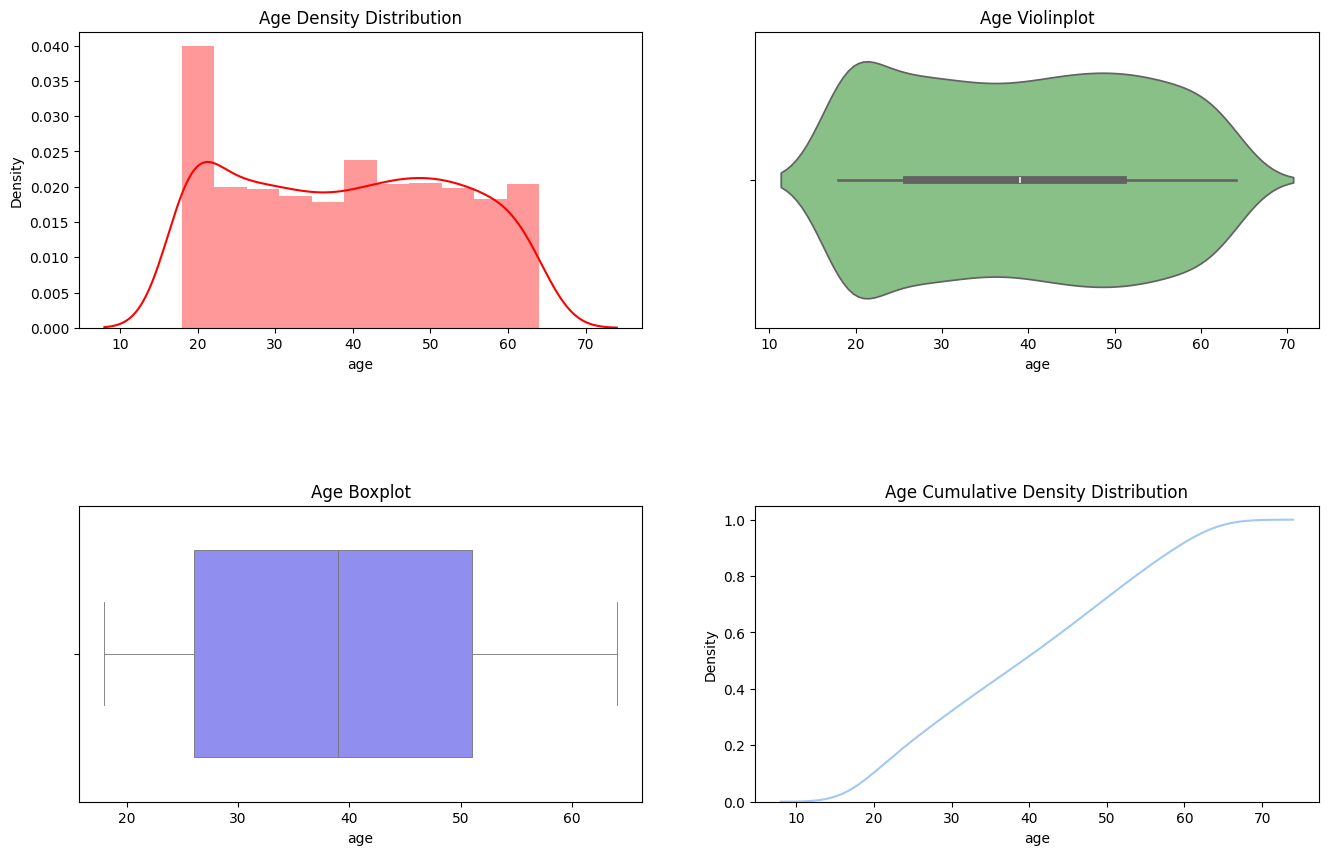

In [16]:
summary('age')

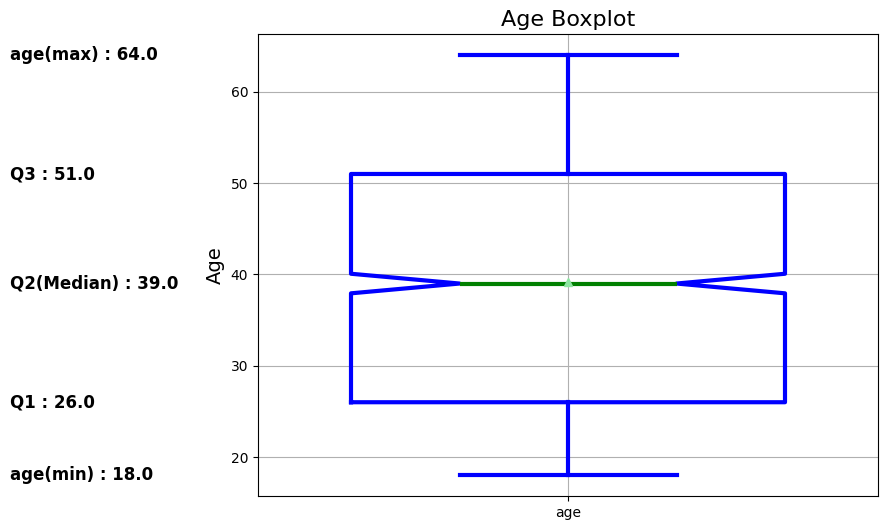

Mean Age = 39.18
Median Age = 39.00
Skewness of age: 0.05726246987418543.
Total number of outliers in age distribution: 0.


In [17]:
box_plot('age')

In [18]:

# Filter the DataFrame for people with age 64, but don't overwrite df
df_64 = df[df['age'] == 64]



# Calculate the total number of people
total_people = len(df)

# Calculate the number of insured people with age 64
insured_people_64 = len(df_64)

# Calculate the percentage of insured people with age 64
percentage_insured_64 = (insured_people_64 / total_people) * 100

# Print the results
print(df_64.head())
print()
print(f'Total number of insured people with the age of 64: {insured_people_64}.')
print(f'Percentage of people insured with the age of 64: {percentage_insured_64:.2f}%.')


     age     sex    bmi  children smoker     region   charges
62    64    male  24.70         1     no  northwest  30166.62
94    64  female  31.30         2    yes  southwest  47291.06
199   64  female  39.33         0     no  northeast  14901.52
328   64  female  33.80         1    yes  southwest  47928.03
335   64    male  34.50         0     no  southwest  13822.80

Total number of insured people with the age of 64: 22.
Percentage of people insured with the age of 64: 1.64%.


5-Point Summary of Charges Attribute:
Charges (Min): 1121.87
Q1: 4733.64
Q2 (Median): 9382.03
Q3: 16687.37
Charges (Max): 63770.43


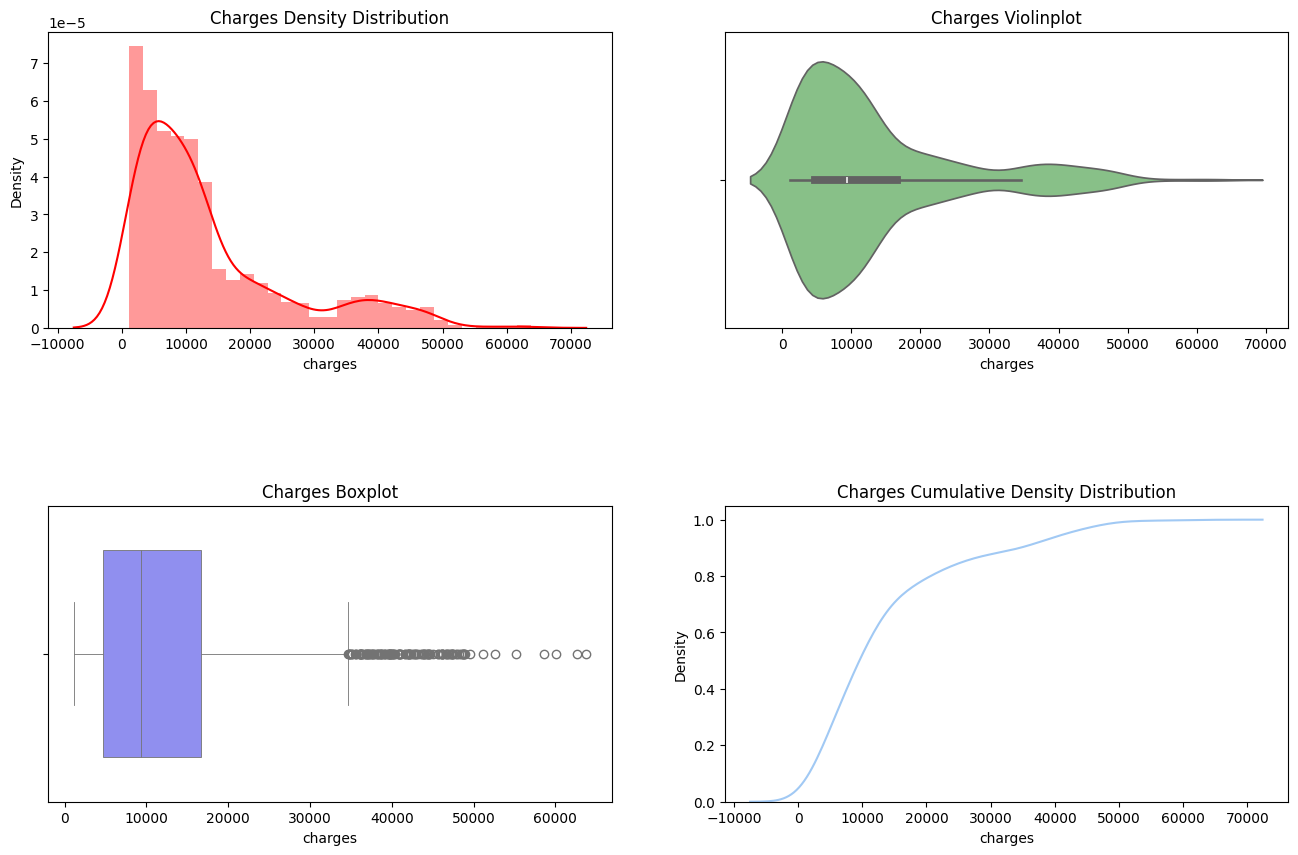

In [19]:
summary('charges')

In [20]:
#Who is paying the highest charges?
df[df['charges'] ==df['charges'].max()]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.43


In [21]:
#who is insured with highest bmi and how does his/her charges compare to the rest?
df[df['bmi'] ==df['bmi'].max()]


,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,1163.46


In [22]:
df['charges'].mean(), df['charges'].median()

(13264.50408955224, 9382.029999999999)

#Observation
•	The Charges distribution of the Insured is heavily skewed to the left (median < mean) with a Mean of 13270.4223 and Median of 9382.033. The lowest charged amount is 1121.8739 and the highest charged amount is 63770.42801.

•	Out of a total of 1338 data points, there are a total of 139 outlier values in the distribution of charges, all in the higher side. The highest charges paid is 63770.42801.

•	The insured chared with highest premium is a 54 years old female smoker with relatively high BMI (indicating obesity).

•	The person with the highest BMI (obese, or least healthy, based on available data) is also one of the youngest (male, 18, non-smoker.) He is paying less premium charges than the mean(which, we note, is affected by extreme outlier values of charges like the person above), but significantly more than the median. This is in line with our basic understanding of underwriting rules.


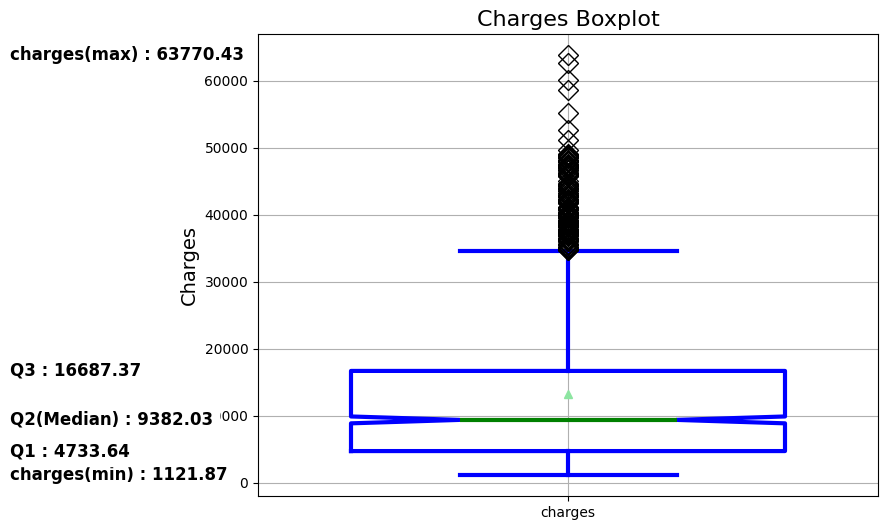

Mean Charges = 13264.50
Median Charges = 9382.03
Skewness of charges: 1.5161533144899777.
Total number of outliers in charges distribution: 138.


In [23]:
box_plot('charges')

5-Point Summary of Bmi Attribute:
Bmi (Min): 15.96
Q1: 26.32
Q2 (Median): 30.4
Q3: 34.68
Bmi (Max): 53.13


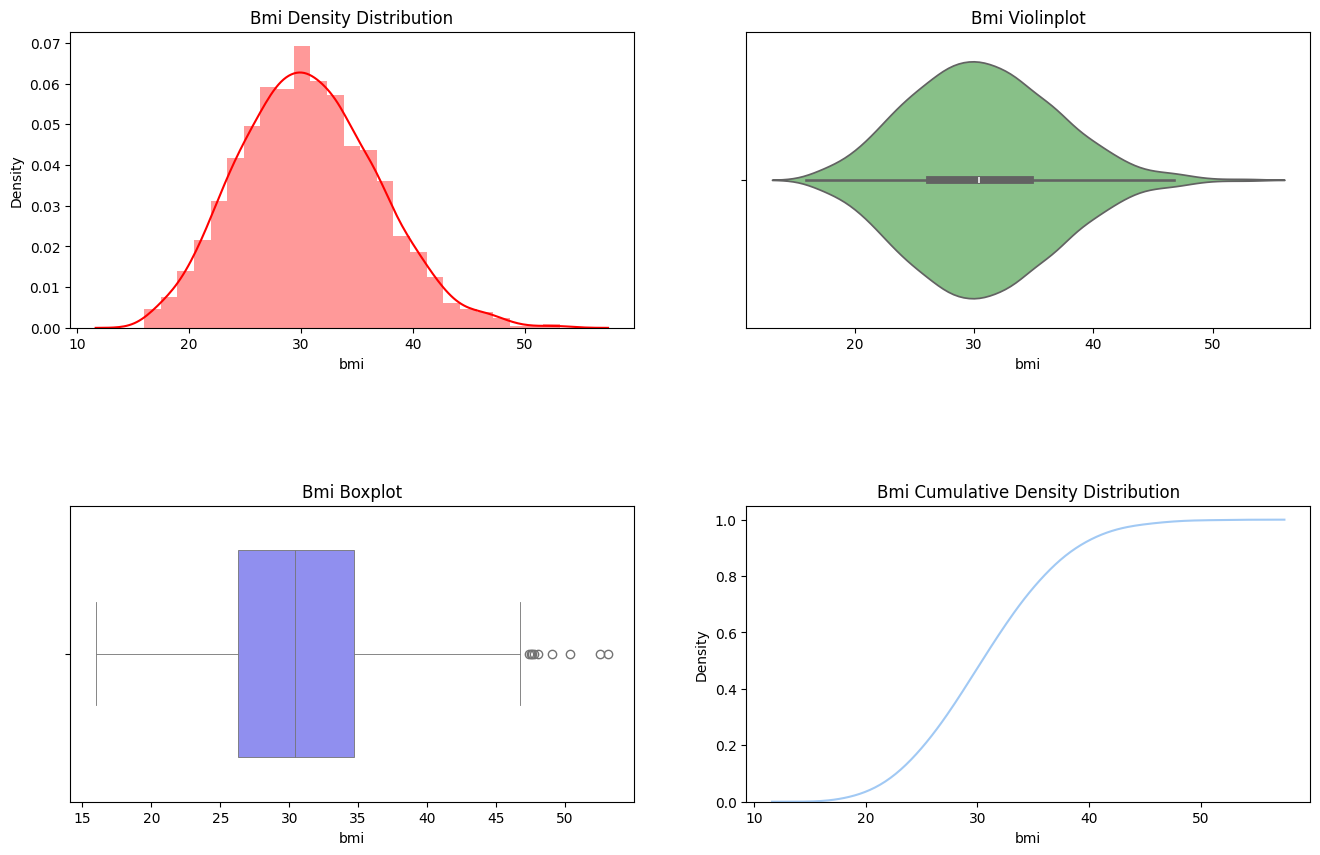

In [24]:
summary('bmi')

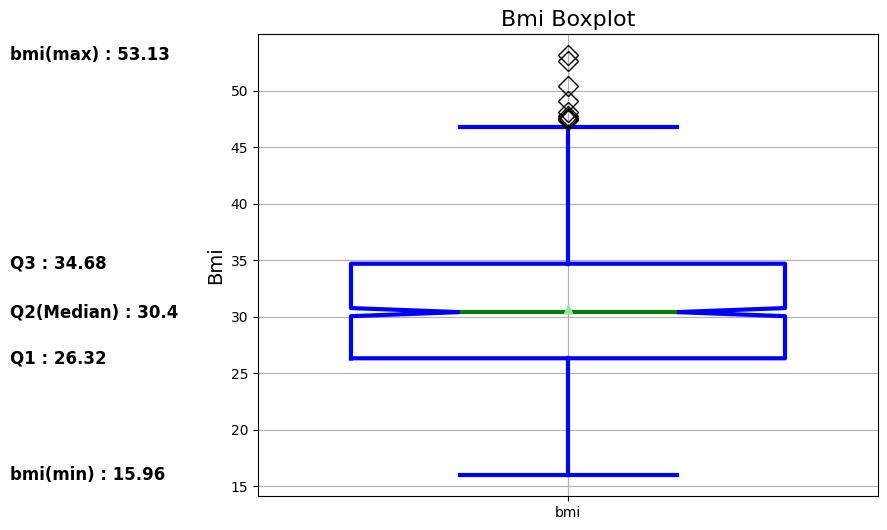

Mean Bmi = 30.67
Median Bmi = 30.40
Skewness of bmi: 0.2833011494319411.
Total number of outliers in bmi distribution: 9.


In [25]:
box_plot('bmi')

In [26]:
# Calculate Q1, Q3, and IQR for each numerical column
numerical_cols = ['bmi', 'charges']
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower limits for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Remove rows where bmi or charges are outliers
df_cleaned = df[
    (df['bmi'] >= lower_limit['bmi']) & (df['bmi'] <= upper_limit['bmi']) &
    (df['charges'] >= lower_limit['charges']) & (df['charges'] <= upper_limit['charges'])
]

# Check the number of rows after filtering
print(f'Number of rows after removing outliers: {len(df_cleaned)}')


Number of rows after removing outliers: 1196


#Bivariate Analysis

In [27]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1196 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1196 non-null   int64  
 1   sex       1196 non-null   object 
 2   bmi       1196 non-null   float64
 3   children  1196 non-null   int64  
 4   smoker    1196 non-null   object 
 5   region    1196 non-null   object 
 6   charges   1196 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 74.8+ KB


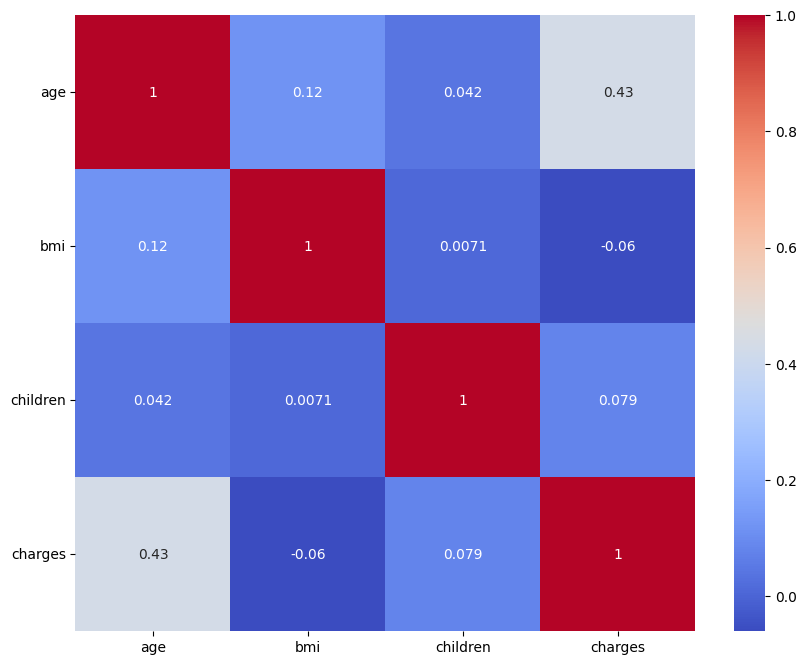

In [28]:
# Select only numerical columns from the cleaned DataFrame
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns

# Compute the correlation matrix
corr_matrix = df_cleaned[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.yticks(rotation=360)
plt.show()


Observation:
As we can see there is a good correlation between age and charges, we can deep dive into its further analysis

In [29]:
df_cleaned['age'].unique(),df_cleaned['age'].nunique()

(array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 52, 30, 59, 63,
        55, 26, 24, 41, 38, 21, 48, 40, 58, 53, 34, 43, 64, 20, 61, 27, 44,
        57, 29, 22, 45, 35, 54, 49, 47, 51, 42, 50, 36, 39]),
 47)

__Summary__:
- There 47 different types of ages of the person coming to the hospital for treatment.
- It's benefical to get the age groups of these persons to get the excat insights


###Analysis wrt Age:

---------Pairplot wrt 'sex'----------


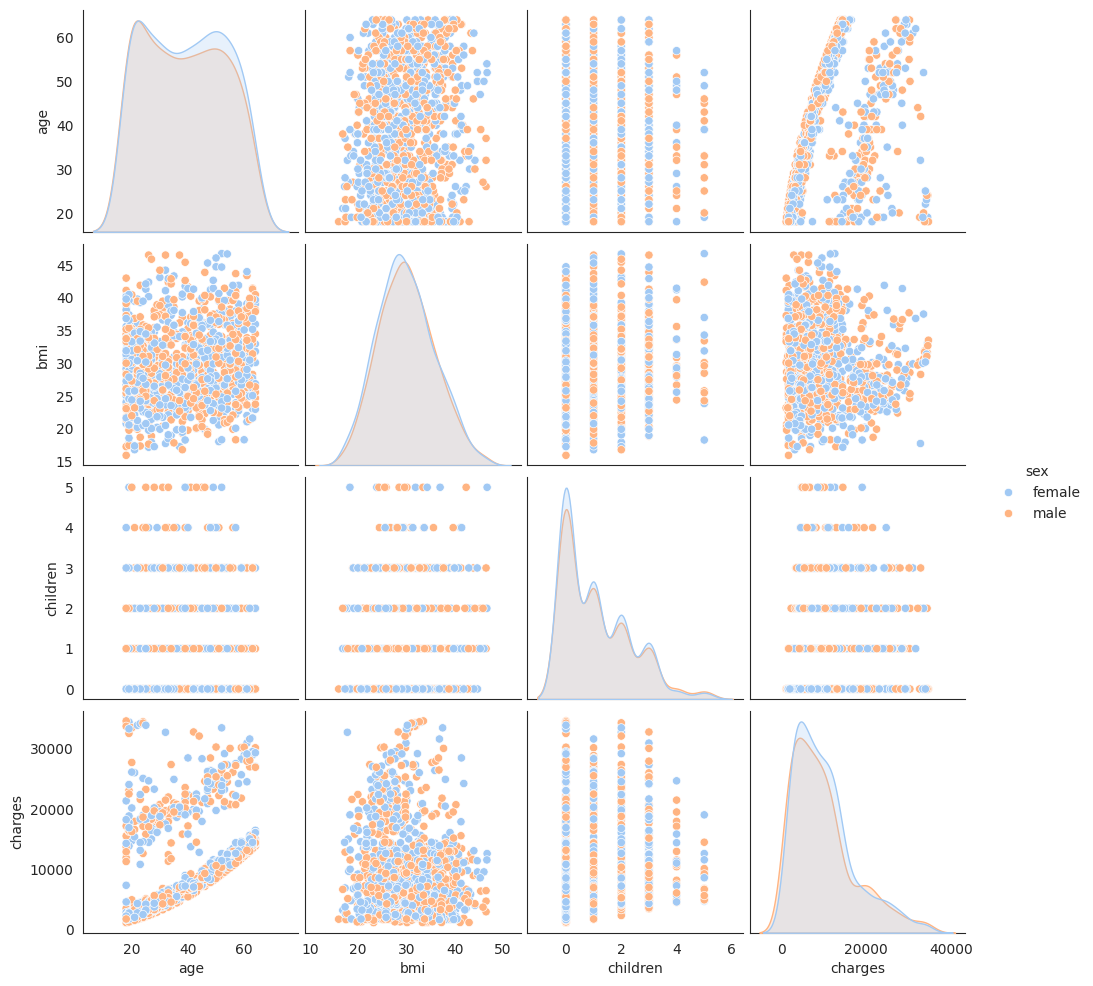

---------Barplot----------


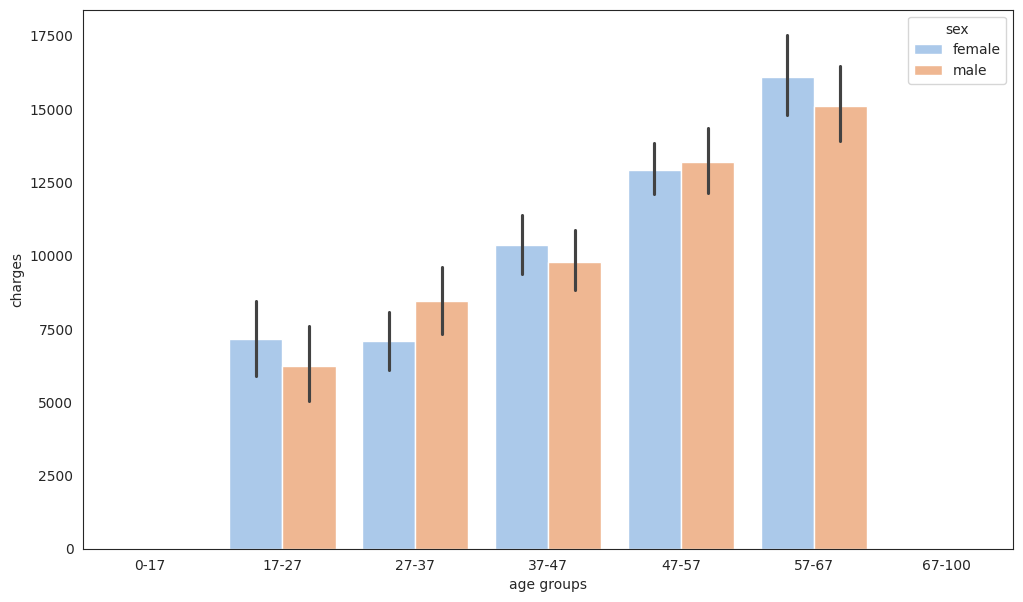

---------Pairplot wrt 'sex'----------


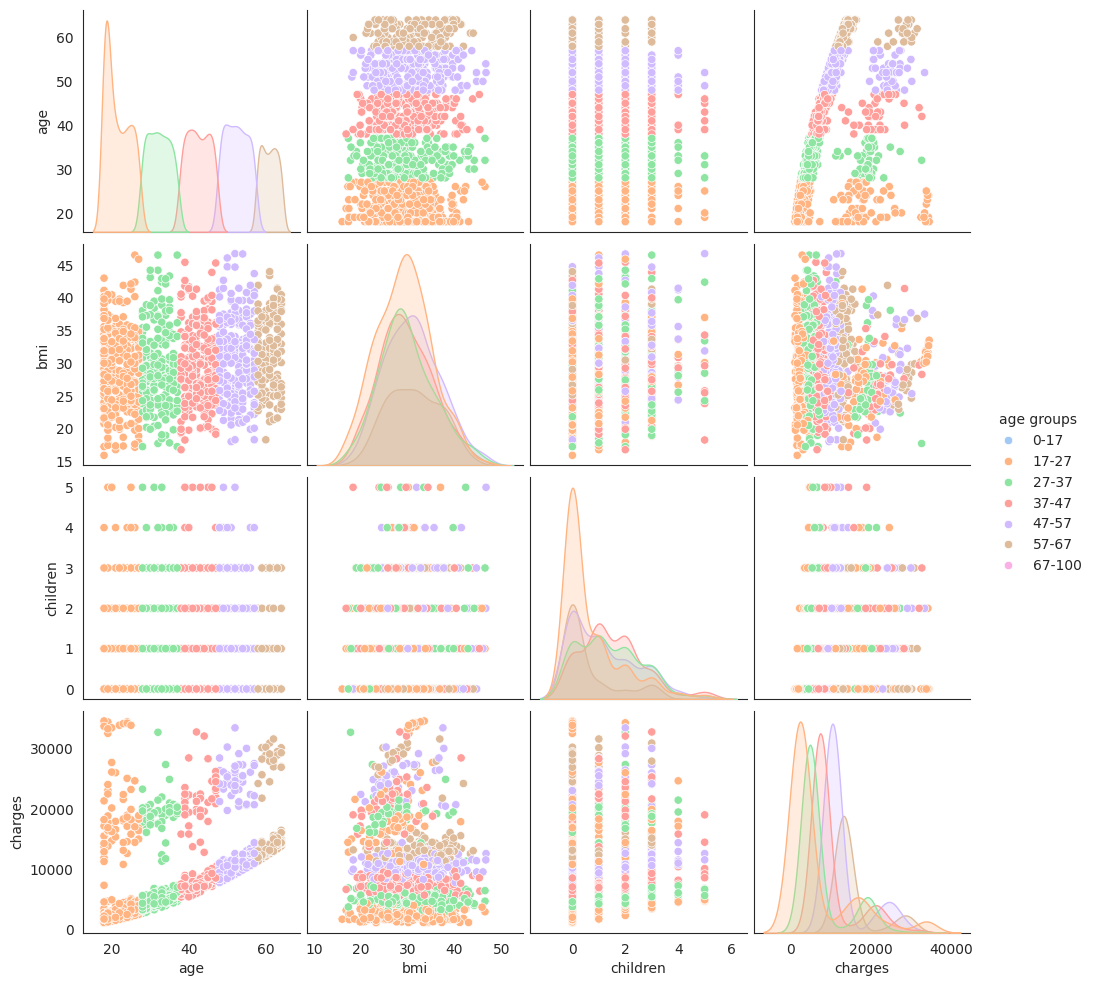

In [30]:
# Creating 7 bins for age groups of persons.

bins = [0,17,27,37,47,57,67,100]
labels = ['0-17','17-27','27-37','37-47','47-57','57-67','67-100']
df_cleaned['age groups'] = pd.cut(x = df_cleaned['age'], bins = bins, labels = labels)
df_cleaned.head()

#Quick overview of the data w.r.t sex

sns.set_style('white')
sns.pairplot(df_cleaned,hue='sex')
print("---------Pairplot wrt 'sex'----------")
plt.show()

plt.figure(figsize=(12,7))
sns.barplot(x = 'age groups', y = 'charges', data = df_cleaned, hue = 'sex')
print("---------Barplot----------")
plt.show()

#Quick overview of the data w.r.t age

sns.set_style('white')
sns.pairplot(df_cleaned,hue='age groups')
print("---------Pairplot wrt 'sex'----------")
#plt.title("Pairplot wrt age")
plt.show()

__Summary__:
- As we can see from the population distribution plot for male and females, the number if persons are similar from both the groups. There's a slight increase in the charges for males than females which can be thought in terms of the slightly higher number of aged males getting admitted as compared to aged females. And this fact can be seen in the barplot where I have focused more on age analysis as we found high corelation between age and charges from the heatmap.
- As the age of the persons increases, the charges also increases as there might be few other complications along with COVID-19 in older people.

###Analysis w.r.t 'Smoker'

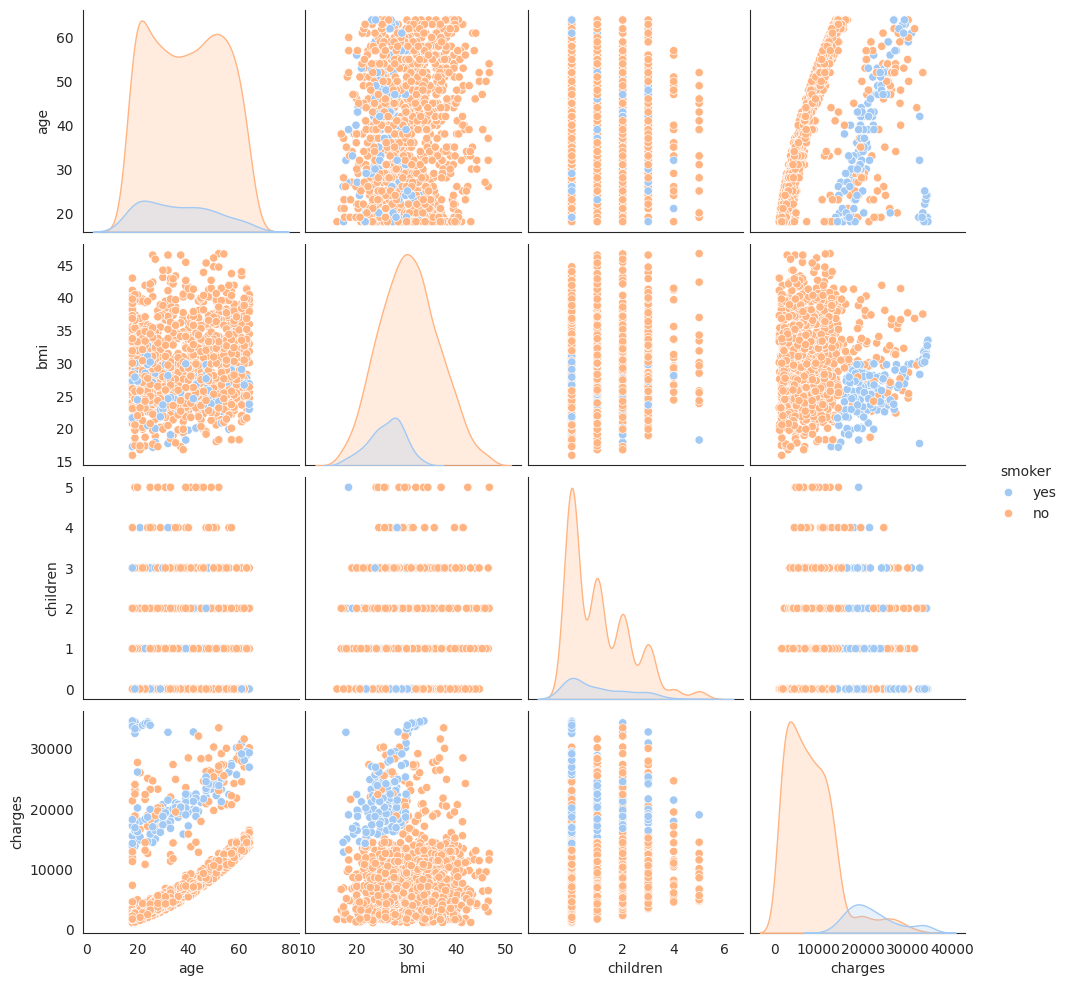

In [31]:
#Quick overview of the data w.r.t smoker

sns.set_style('white')
sns.pairplot(df_cleaned,hue='smoker')
plt.show()

__Summary__:
- There are comparatively less population of smokers to that of non smokers.
- Whereas, the charges and the bmi for smokers are way higher than that of non smokers.
- The smokers with bmi greater than or equal to 30tends to spend more on charges and related expenditures.The non-smoker persons whose bmi is also greater than 30tends to spend less on the charges. This disparity can br thought in terms of the other health complications that are involved for the non-smokers due to increased bmi and it's impact on poor lungs.


__Recommendations__:
- There should be some kind of awareness campaign to put a stop on smoking habits as it's clearly evident from the data that, smoker persons have spend extra money on health which can include, surgery, lung transplant, prolonged covid-19 infection, etc. The reason behind this is also clearly evident from the data of bmis of these smoker persons which is way higher than 30along with other complications as stated and proved in above summary points by comaparing the smoker and non-smokers with bmi greater than 30. These points should be majorly focused and highlighted in the compaign .

###Analysis w.r.t 'Region'

---------Pairplot wrt 'region'----------


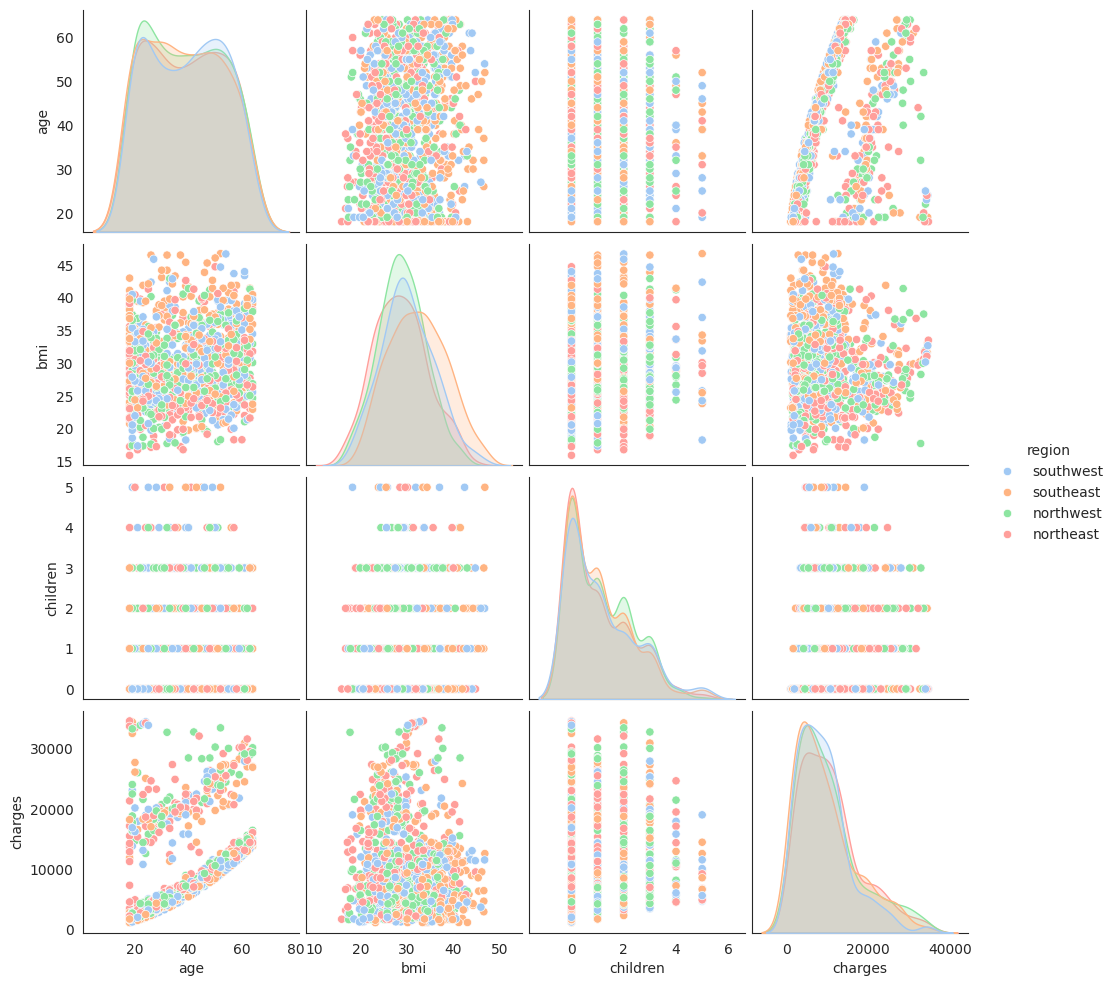

---------Barplot----------


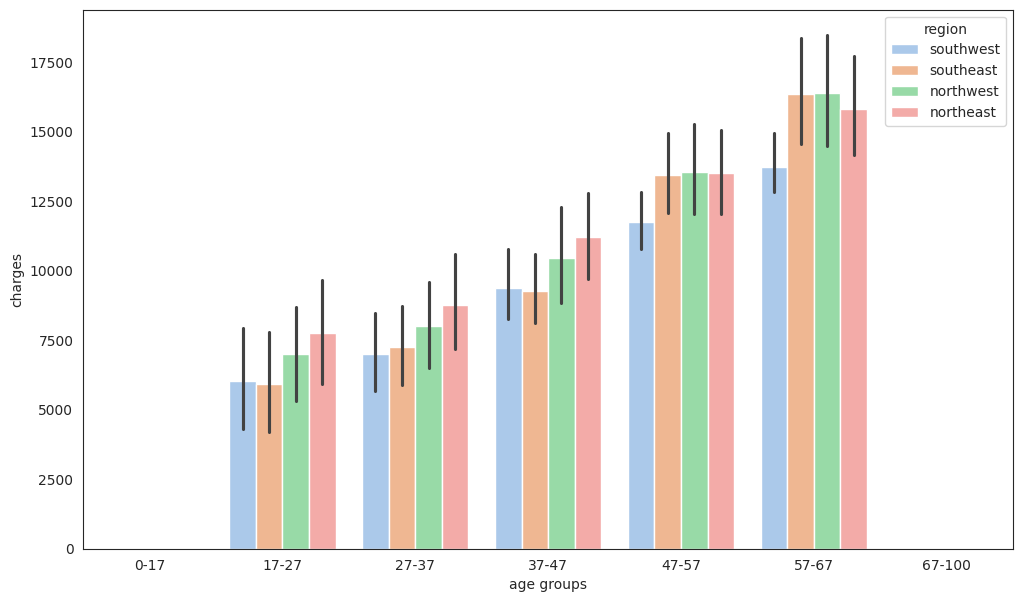

In [32]:
#Quick overview of the data w.r.t region

sns.set_style('white')
sns.pairplot(df_cleaned,hue='region')
print("---------Pairplot wrt 'region'----------")
plt.show()

plt.figure(figsize=(12,7))
sns.barplot(x = 'age groups', y = 'charges', data = df_cleaned, hue = 'region')
print("---------Barplot----------")
plt.show()

__Summary__:
- As we can see from the pairplot w.r.t region differentiation, persons coming from souteast regions has slightly higher bmi as compared to other three regions, also they bear higher charges as compared to others, whereas they have slightly higher population of aged persons.

__Recomendations__:
- The outbreak of COVID-19 is major and not controlled by the existing civil bodies specifically in the southeast region. The government agencies needs to fix this and make sure all the necessary protocal are being followed in the southeast region to be specific. Proper sanitation, hygene, social distancing and mask protocols should be strictly adhered by the southeast people so the the outbreak can be controlled.If necessary, stricter restrictions such as lockdowns can also be an option that government agencies/bodies has to think of.

### Analysis w.r.t 'Children'

---------Pairplot wrt 'children'----------


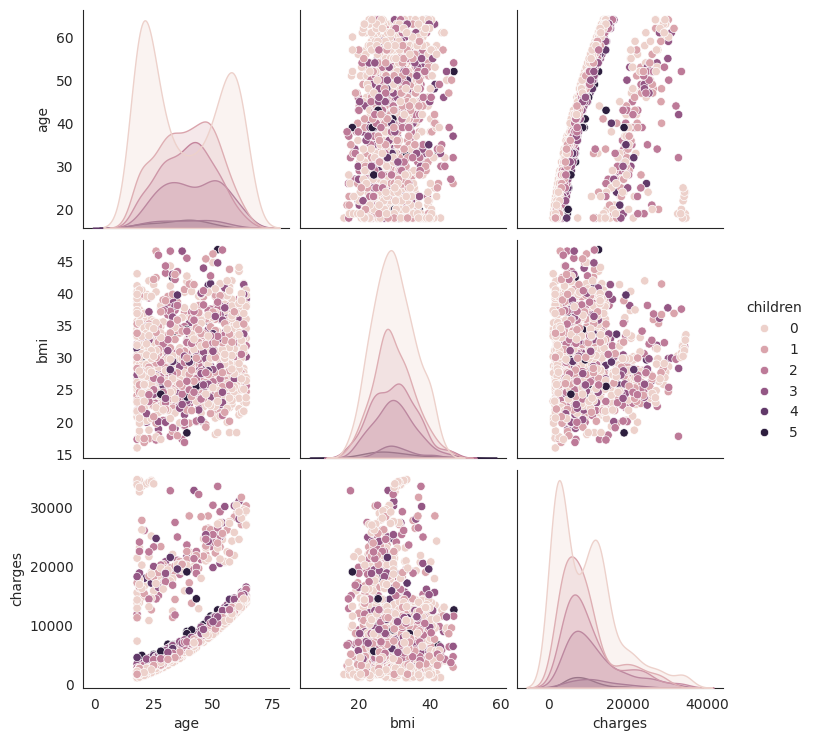

---------Barplot----------


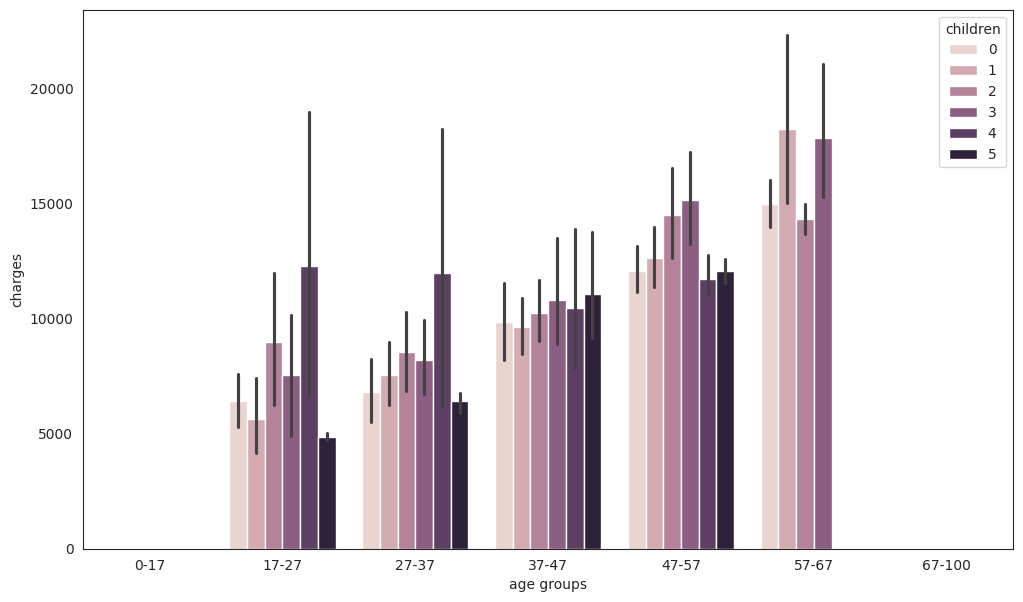

In [33]:
#Quick overview of the data w.r.t Children

sns.set_style('white')
sns.pairplot(df_cleaned,hue='children')
print("---------Pairplot wrt 'children'----------")
plt.show()

plt.figure(figsize=(12,7))
sns.barplot(x = 'age groups', y = 'charges', data = df_cleaned, hue = 'children')
print("---------Barplot----------")
plt.show()



__Summary__:
- In the age group from 57-67, the charges for children - 4 is maximum which clearly means that persons more number of children tends to spend more on insurance charges

__Summary__:
- The final conclusion from EDA regarding charges can be seen from above dataframe where the charges for the people (male/female) in general from any of the regions who are smokers, are almost 5 times more than the people who don't smoke at all.
- For all the regions, females who are non-smokers have more charges than that of non-smokers males. This might be due to low immunity power or some other complicated issues.

__Recommendations:__
- So the employer needs to encourage the employees who are smokers to get more health insurance coverage or at least increase or add some top up upon their existing coverage so that they won't get get shock after seeing the charges and the final bill if they are supposed to be hospitalized
- Similarly employer needs to encourage the female employees to get their insurance cover renewed to save themselves from further financial crisis in case of any medical emergencies like COVID-19.

# Statistical Analysis:

# Problem statement 1: To prove or disprove that the charges of people who do smoking is greater than those who don't smoke.

**Two-sample t-test assumptions**
- Data values must be independent. Measurements for one observation do not affect measurements for any other observation.
- Data in each group must be obtained via a random sample from the population.
- Data in each group are normally distributed.
- Data values are continuous.
- The variances for the two independent groups are equal.

- Setting up Null Hypothesis (H0) and Stating the alternate hypothesis (Ha) and significance level
    - **H0 : The average charges of smokers is less than or equal to nonsmoker**
    - **Ha : The average charges of smokers are greater than nonsmoker**
    - alpha = 0.05
- As the varaince of population is unknown, we will perform Right tailed T test.



In [34]:
df[df['smoker'] == 'yes'].shape[0],df[df['smoker'] == 'no'].shape[0]

(275, 1065)

In [35]:
# Taking 120 samples i.e minimalistic samples that atleast each group has.
smoker_charges = df[df['smoker'] == 'yes']['charges'].sample(120, replace = True)
nonsmoker_charges = df[df['smoker'] == 'no']['charges'].sample(120, replace = True)
#Checking Median
round(smoker_charges.median()), round(nonsmoker_charges.median())


(33048, 7101)

#### Normality Test:
We will perform normality check using **Shapiro test.**

The hypothesis of this test are:
- Null Hypothesis Ho - series is normal
- Alternative Hypothesis Ha - series is not normal

In [36]:
from scipy.stats import shapiro
def normality_check(series, alpha=0.05):
    _, p_value = shapiro(series)
    print(f'p value = {p_value}')
    if p_value >= alpha:
        print('We fail to reject the Null Hypothesis Ho')
    else:
        print('We reject the Null Hypothesis Ho')

In [37]:
normality_check(smoker_charges)

p value = 7.572322188928987e-05
We reject the Null Hypothesis Ho


In [38]:
normality_check(nonsmoker_charges)

p value = 3.9447976199045995e-08
We reject the Null Hypothesis Ho


__Conclusions__
- All the distributions do not pass the normality check

#### Equality of Variance Test:
We will perform equivalence check for using using Levene's test.

The hypothesis of this test are:
- Null Hypothesis Ho - Variances are equal
- Alternative Hypothesis Ha - Variances are not equal

In [39]:
from scipy.stats import levene
def variance_check(series1, series2, alpha=0.05):
    _, p_value = levene(series1, series2)
    print(f'p value = {p_value}')
    if p_value >= alpha:
        print('We fail to reject the Null Hypothesis Ho')
    else:
        print('We reject the Null Hypothesis Ho')

In [40]:
variance_check(smoker_charges,nonsmoker_charges)

p value = 4.6248545607741725e-14
We reject the Null Hypothesis Ho


__Conclusion__

The distributions fail to satisfy all the assumptions of t-test.
Hence, we will use the non-parametric __Mann Whitney test__ to assess whether there is a statistically significant difference in the distribution of smoker_charges,nonsmoker_charges.

__Mann Whitney test__:

The hypothesis of this test are:
- Null Hypothesis Ho - underlying distribution is same
- Alternative Hypothesis Ha - underlying distribution is not same

We will use alpha = 0.05

In [41]:
from scipy.stats import mannwhitneyu
test, p_val= mannwhitneyu(smoker_charges,nonsmoker_charges)

if p_val >= 0.05:
    print('We fail to reject the Null Hypothesis Ho')
else:
    print('We reject the Null Hypothesis Ho')

We reject the Null Hypothesis Ho


#### Although, normality test and the man whitney test have failed  to validate the assumptions for t-test, Variance for the samples of both the groups is not exactly same but is nearly similar. Hence we can proceed further in doing the 2 sample Right tailed test:

In [42]:
alpha = 0.05
t_stats, p_value = stats.ttest_ind(smoker_charges,nonsmoker_charges, alternative = 'greater',equal_var = True)
print(f"p-value is {p_value}, test statistics is {t_stats}")
if p_value < alpha:
      print(f"Since p value {p_value} is less than alpha {alpha}, we reject the null hypothesis and can say that The average charges of smokers are greater than that of nonsmoker")
else:
    print(f"We fail to reject the H0 and hence can say that charges for both smokers and non smokers are same.")

p-value is 7.192187556637671e-49, test statistics is 18.685091218859263
Since p value 7.192187556637671e-49 is less than alpha 0.05, we reject the null hypothesis and can say that The average charges of smokers are greater than that of nonsmoker


__Conclusion:__
- **Since p value is less than alpha 0.05**, we reject the null hypothesis and can say that the **average charges of smokers are greater than that of nonsmoker**

# Problem statement 2: To Prove (or disprove) with statistical evidence that the bmi of females is different from that of males

**Two-sample t-test assumptions**
- Data values must be independent. Measurements for one observation do not affect measurements for any other observation.
- Data in each group must be obtained via a random sample from the population.
- Data in each group are normally distributed.
- Data values are continuous.
- The variances for the two independent groups are equal.

- Setting up Null Hypothesis (H0) and Stating the alternate hypothesis (Ha) and significance level
    - **H0 : The bmi of females is same as that of males**
    - **Ha : the bmi of females is different from that of males**
    - alpha = 0.05
- As the variance of population is unknown, we will perform T test.

In [43]:
df.groupby('sex')['bmi'].describe()


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,663.0,30.372123,6.041933,16.815,26.125,30.10,34.3075,48.07
male,677.0,30.956259,6.132006,15.960,26.410,30.69,34.9600,53.13


In [44]:
female_viral_load = df[df['sex'] == 'female']['bmi']
male_viral_load = df[df['sex'] == 'male']['bmi']

In [45]:
female_viral_load.shape[0],male_viral_load.shape[0]

(663, 677)

We will take 500 as limiting sample size for both male and females's bmi

In [46]:
female_viral_load_sample = df[df['sex'] == 'female']['bmi'].sample(500,replace = True)
male_viral_load_sample = df[df['sex'] == 'male']['bmi'].sample(500, replace = True)

In [47]:
#Checking Variance
round(female_viral_load_sample.std()**2,2), round(male_viral_load_sample.std()**2 ,2)

(39.57, 40.3)

#### Normality Test:
We will perform normality check using **Shapiro test.**

The hypothesis of this test are:
- Null Hypothesis Ho - series is normal
- Alternative Hypothesis Ha - series is not normal

In [48]:
from scipy.stats import shapiro
def normality_check(series, alpha=0.05):
    _, p_value = shapiro(series)
    print(f'p value = {p_value}')
    if p_value >= alpha:
        print('We fail to reject the Null Hypothesis Ho')
    else:
        print('We reject the Null Hypothesis Ho')

In [49]:
normality_check(female_viral_load_sample)
print('-'*50)
normality_check(male_viral_load_sample)

p value = 3.797354465996746e-05
We reject the Null Hypothesis Ho
--------------------------------------------------
p value = 0.00028815109177568655
We reject the Null Hypothesis Ho


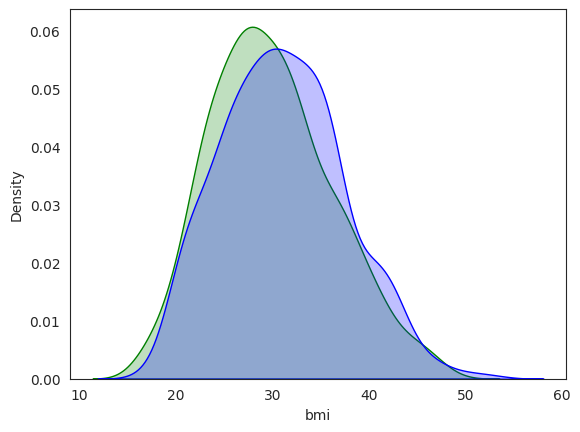

In [50]:
sns.kdeplot(female_viral_load_sample,color = 'green',shade='green')
sns.kdeplot(male_viral_load_sample,color = 'blue',shade = 'blue')
plt.show()

#### Equality of Variance Test:
We will perform equivalence check for using using Levene's test.

The hypothesis of this test are:
- Null Hypothesis Ho - Variances are equal
- Alternative Hypothesis Ha - Variances are not equal

In [51]:
from scipy.stats import levene
def variance_check(series1, series2, alpha=0.05):
    _, p_value = levene(series1, series2)
    print(f'p value = {p_value}')
    if p_value >= alpha:
        print('We fail to reject the Null Hypothesis Ho')
    else:
        print('We reject the Null Hypothesis Ho')

In [52]:
variance_check(female_viral_load_sample,male_viral_load_sample)

p value = 0.7846645235463725
We fail to reject the Null Hypothesis Ho


__Conclusion__

The distributions fail to satisfy all the assumptions of t-test.
Hence, we will use the non-parametric __Mann Whitney test__ to assess whether there is a statistically significant difference in the distribution of smoker_charges,nonsmoker_charges.

__Mann Whitney test__:

The hypothesis of this test are:
- Null Hypothesis Ho - underlying distribution is same
- Alternative Hypothesis Ha - underlying distribution is not same

We will use alpha = 0.05

In [53]:
from scipy.stats import mannwhitneyu
test, p_val= mannwhitneyu(female_viral_load_sample,male_viral_load_sample)

if p_val >= 0.05:
    print('We fail to reject the Null Hypothesis Ho')
else:
    print('We reject the Null Hypothesis Ho')

We reject the Null Hypothesis Ho


- **Normality test - Shapiro Wilk test -> Failed**
- **Equality of Variance Test - Levene's Test -> Pass**
- **Non-parametric Test for confirmation - Mann Whitney test -> Pass**

Hence we can proceed for 2 sample t test:

In [54]:
alpha = 0.05
t_stats, p_value = stats.ttest_ind(female_viral_load_sample,male_viral_load_sample,equal_var = True)
print(f"p-value is {p_value}, test statistics is {t_stats}")
if p_value < alpha:
      print(f"Since p value {p_value} is less than alpha {alpha}, we reject the null hypothesis and can say that the bmi of females is different than that of males")
else:
    print(f"We fail to reject the H0 and hence can say that the bmi of females is same as that of males.")

p-value is 0.004189299978600635, test statistics is -2.8701578547940625
Since p value 0.004189299978600635 is less than alpha 0.05, we reject the null hypothesis and can say that the bmi of females is different than that of males


**As concluded from the 2 sampled right tailed T test the bmi of females is same as that of males.**

# Problem statement 3: To check if the proportion of smoking is significantly different across different regions

- Setting up Null Hypothesis (H0) and Stating the alternate hypothesis (Ha) and significance level
    - **H0 : Smokers proportions is not significantly different across different regions**
    - **Ha : Smokers proportions different across different regions**
    - alpha = 0.05
- Here we are comparing two different categorical variables - smoker and region. So in this case we will perform __Chi-Square test of Independence__

**Assumptions:**
- Assumption 1: Both variables are categorical.
- Assumption 2: All observations are independent.
- Assumption 3: Cells in the contingency table are mutually exclusive.
- Assumption 4: Expected value of cells should be 5 or greater in at least 80% of cells.
    - It’s assumed that the expected value of cells in the contingency table should be 5 or greater in at least 80% of cells and that no cell should have an expected value less than 1.

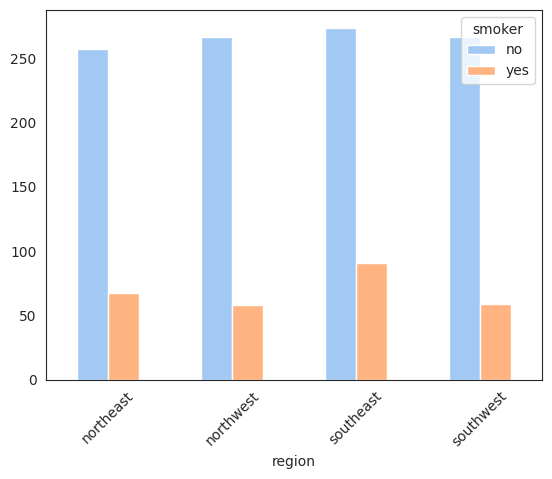

Chi-square statististics value = 6.956938740772003, p-value is 0.07328301982747112, degrees of freedom is 3 and array of expected frequenies is [[257.50746269  66.49253731]
 [258.30223881  66.69776119]
 [290.09328358  74.90671642]
 [259.09701493  66.90298507]]
We fail to reject the Null Hypothesis Ho and thus we can conclude that smokers proportion is not significantly different in different regions"


In [55]:
df['region'].count(),df['smoker'].count()
df.groupby(['region','smoker'])['age'].count().unstack()
pd.crosstab(df['region'],df['smoker'],margins = True)
contingency_table = pd.crosstab(df['region'],df['smoker'])
contingency_table
contingency_table.plot(kind = 'bar')
# sns.barplot(data= contingency_table,hue = 'smoker',x = contingency_table['region'])
plt.xticks(rotation = 45)
plt.show()

t_stats, p_value, dof, expected_frequencies  = stats.chi2_contingency(contingency_table)
#stat, p, dof, expected
print(f"Chi-square statististics value = {t_stats}, p-value is {p_value}, degrees of freedom is {dof} and array of expected frequenies is {expected_frequencies}")

alpha = 0.05
if p_value >= alpha:
    print('We fail to reject the Null Hypothesis Ho and thus we can conclude that smokers proportion is not significantly different in different regions"')
else:
    print('We reject the Null Hypothesis Ho')


**As concluded from the Chi-Square test the smokers proportion is not significantly different in different regions.**

# Problem statement 4: To check if the mean bmi of women with 0-children , 1-children, and 2-children the same.

- Setting up Null Hypothesis (H0) and Stating the alternate hypothesis (Ha) and significance level
    - **H0 : The bmi of women with no children, 1 children and 2 children is same**
    - **Ha : Atleaset one of the mean bmi is different**
    - alpha = 0.05
- Here we are comparing equality of population through variance of samples. So in this case we will perform __One Way Annova__

**Assumptions:**
- Normality – that each sample is taken from a normally distributed population
- Sample independence – that each sample has been drawn independently of the other samples
- Variance equality – that the variance of data in the different groups should be the same
- Your dependent variable – here, “count”, should be continuous – that is, measured on a scale which can be subdivided using increments

In [56]:
df[df['sex'] == 'female'].groupby('children')['bmi'].describe().head(3)

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,290.0,30.353034,5.958355,17.290,26.2050,29.9225,34.57125,47.41
1,158.0,30.052658,5.786831,16.815,25.9825,29.5675,33.94250,46.09
2,119.0,30.639263,6.627160,17.195,25.7700,30.9000,34.75000,48.07


Here the limiting factor for samples selection is 106 and hence we will be taking less than 106 i.e 100 samples for further testing using One way Annova

In [57]:

# As we can see 'children' denotes the integer indicating how severe the person is in the original data
# Since  this is a categorical feature and thus we had converted it to category datatype.
# But, we need to test if the bmi is same for threse children (0,1,2).
# And as we will not be able to comapre with categorical numbers, re-converting into integers. (int64) datatype.

df['children'] = df['children'].astype('int64')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1340 non-null   int64  
 1   sex       1340 non-null   object 
 2   bmi       1340 non-null   float64
 3   children  1340 non-null   int64  
 4   smoker    1340 non-null   object 
 5   region    1340 non-null   object 
 6   charges   1340 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.4+ KB


In [58]:
female_Children_df = df[df['sex'] == 'female'].loc[df[df['sex'] == 'female']['children'] <= 2]

In [59]:
female_Children_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
5,31,female,25.74,0,no,southeast,3756.62
6,46,female,33.44,1,no,southeast,8240.59
9,60,female,25.84,0,no,northwest,28923.14
11,62,female,26.29,0,yes,southeast,27808.73
...,...,...,...,...,...,...,...
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94
1337,61,female,29.07,0,yes,northwest,29141.36


In [60]:
female_Children_df['children'].value_counts()

,count
children,
0,290
1,158
2,119


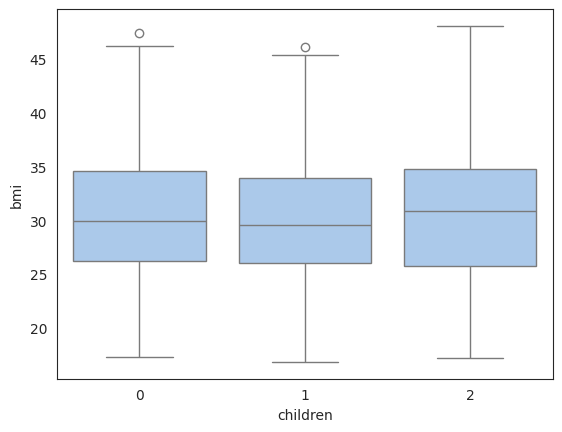

In [61]:
sns.boxplot(x = 'children', y = 'bmi', data =female_Children_df )
plt.show()

#### Normality Test:
We will perform normality check using **Shapiro test.**

The hypothesis of this test are:
- Null Hypothesis Ho - series is normal
- Alternative Hypothesis Ha - series is not normal

In [62]:
from scipy.stats import shapiro
def normality_check(series, alpha=0.05):
    _, p_value = shapiro(series)
    print(f'p value = {p_value}')
    if p_value >= alpha:
        print('We fail to reject the Null Hypothesis Ho')
    else:
        print('We reject the Null Hypothesis Ho')

In [63]:
normality_check(female_Children_df['bmi'].sample(100, replace = True))

p value = 0.6027691460094993
We fail to reject the Null Hypothesis Ho


#### Equality of Variance Test:
We will perform equivalence check for using using Levene's test.

The hypothesis of this test are:
- Null Hypothesis Ho - Variances are equal
- Alternative Hypothesis Ha - Variances are not equal


In [64]:
from scipy.stats import levene
def variance_check(series1, series2, series3, alpha=0.05):
    _, p_value = levene(series1, series2, series3)
    print(f'p value = {p_value}')
    if (p_value >= alpha).all():
        print('We fail to reject the Null Hypothesis Ho')
    else:
        print('We reject the Null Hypothesis Ho')

In [65]:
female_Children_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 567 entries, 0 to 1338
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       567 non-null    int64  
 1   sex       567 non-null    object 
 2   bmi       567 non-null    float64
 3   children  567 non-null    int64  
 4   smoker    567 non-null    object 
 5   region    567 non-null    object 
 6   charges   567 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 35.4+ KB


In [66]:
sample_with_level_0 = female_Children_df[female_Children_df['children'] == 0 ]['bmi'].sample(100,replace = True)
sample_with_level_1 = female_Children_df[female_Children_df['children'] == 1 ]['bmi'].sample(100,replace = True)
sample_with_level_2 = female_Children_df[female_Children_df['children'] == 2 ]['bmi'].sample(100,replace = True)

In [67]:
sample_with_level_0

,bmi
551,28.930
1223,24.420
362,21.700
65,28.900
1237,28.215
...,...
918,28.200
933,35.300
523,37.730
491,25.080


In [68]:
variance_check(sample_with_level_0,sample_with_level_1,sample_with_level_2)

p value = 0.9937597478538961
We fail to reject the Null Hypothesis Ho


In [69]:
stat,p_value = stats.f_oneway(sample_with_level_0,sample_with_level_1,sample_with_level_1)
stat,p_value

(0.18048672271260327, 0.8349552654904775)

In [70]:
alpha = 0.05
if p_value >= alpha:
    print('We fail to reject the Null Hypothesis Ho and thus we can conclude that the bmi of women with no children, 1 children and 2 children is same')
else:
    print('We reject the Null Hypothesis Ho')

We fail to reject the Null Hypothesis Ho and thus we can conclude that the bmi of women with no children, 1 children and 2 children is same


**As concluded from the One - way Annova test , the bmi of women with no children, 1 children and 2 children is same**

# Final Observations , Inferences and Recommendations:

### Observations and Inferences:
- The mean and median age of all persons is same whereas there's a difference in mean and median charges. Median of the charges for both male and female as well as for regions seems to be similar visually and hence we can say that the charges are irrespective of the sex or region or age.
- On the contrary, charges differs significantly for smoker person than non-smokers.
- Out of four regions, maximum frequency of people is from southeast region (364), whereas majority of them are male (676) and non-smokers are more in number (1064/1338) having children of COVID-19 as No Children-0 (574) i.e persons with 0 children / less critical conditions are more in number than more critical conditions.
- Although the persons who smokes tobacco are less in number as compared to non-smokers, the charges incurred by them are more.
- Whereas, charges also differs with the children. As we can see that the persons with more Children seems to incur more charges as compared to less children.
- As we can see from the population distribution plot for male and females, the number of persons are similar from both the groups. There's a slight increase in the charges for males than females which can be thought in terms of the slightly higher number of males getting admitted as compared to females. And this fact can be seen in the barplot where we focused more on age analysis as we found high correlation between age and charges from the heatmap.
- As the age of the persons increases, the charges also increases as there might be few other complications along with ageing in older people.
- There are comparatively less population of smokers to that of non smokers. Whereas, the charges and the bmi for smokers are way higher than that of non smokers.
- The smokers with bmi greater than or equal to 30tends to spend more on charges and related expenditures. The non-smoker persons whose bmi is also greater than 30tends to spend less on the charges. This disparity can be thought in terms of the other health complications that are involved for the non-smokers due to increased bmi and it's impact on poor lungs.
- The max charges for non smokers are around 75,000 whereas, for non smokers it goes till twice this amount i.e 150,000.
- As we can see from the pairplot w.r.t region differentiation, persons coming from southeast regions has slightly higher bmi as compared to other three regions, also they bear higher charges as compared to others, whereas they have slightly higher population of aged persons.
- The final observations from EDA regarding charges can be stated as- the charges incurred by people (male/female) in general from any of the regions who are smokers, are almost 5 times more than the people who don't smoke at all.
- For all the regions, females who are non-smokers have more charges than that of non-smokers males. This might be due to low immunity power or some other complicated issues.
- As concluded from the 2 sampled right tailed T test the average charges of smokers are greater than that of nonsmoker
- As concluded from the 2 sampled right tailed T test the bmi of females is same as that of males.
- As concluded from the One - way Annova test , the bmi of women with no children, 1 children and 2 children is same
- As concluded from the Chi-Square test the smokers proportion is not significantly different in different regions.


# Recommendations:
- As the person with no Children are also spending a lot on charges, the insurance Management needs to allocate proper resources to the persons with more Children than to no / less children persons.

- Persons who smokes are in dire need of insurance coverage and insurance 24/7 can recommend corporates with whom they have tie-ups that more focus should be on smoker population as they have high chance of getting infected with any disease. So the employer needs to encourage the employees who are smokers to get more health insurance coverage or at least increase or add some top up upon their existing coverage so that they won't get get shock after seeing the charges and the final bill. In addition to this, the employees who work for the employer with whom there's a tie up with insurance 24/7 hospitals, should ask or targeted campaign should be initiated with a focus to enroll their parent's and grandparents for the insurance schemes and policies. Similarly employer needs to encourage the female employees to get their insurance cover renewed to save themselves from additional financial crisis in case of any medical emergencies like COVID-19.

- There should be some kind of awareness campaign to put a stop on smoking habits as it's clearly evident from the data that, smoker persons have spent extra money on health which can include, surgery, lung transplant, prolonged covid-19 infection, etc. The reason behind this is also clearly evident from the data of bmis of these smoker persons which is way higher than 30along with other complications as stated and proved in above summary points by comparing the smoker and non-smokers with bmi greater than 30. These points should be majorly focused and highlighted in the campaign.


#Extra:
Create a predictor using above data . Show an estimate of charges when the person enters his details.

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import xgboost as xgb

# Step 1: Load the dataset
# Assume `df` is a DataFrame containing the features: 'age', 'bmi', 'smoker', 'region', 'children', and the target variable 'charges'
X = df.drop('charges', axis=1)  # Features (excluding the target 'charges')
y = np.log(df['charges'])  # Log transform the target variable 'charges' to stabilize variance

# Step 2: Add cluster labels as a feature
# We are using KMeans clustering to add cluster labels as a feature to the dataset

# Define categorical and numerical feature columns
categorical_features = ['smoker', 'region']  # Categorical features: smoker status and region
numerical_features = ['age', 'bmi', 'children']  # Numerical features: age, bmi, and children

# Normalize the numerical features for clustering (scaling is important for KMeans)
scaler = StandardScaler()  # StandardScaler will standardize features to have mean=0 and variance=1
X_scaled = scaler.fit_transform(X[numerical_features])  # Scale the numerical features

# Use KMeans clustering (3 clusters) to generate cluster labels
kmeans = KMeans(n_clusters=3, random_state=42)  # Initialize KMeans with 3 clusters
X['cluster'] = kmeans.fit_predict(X_scaled)  # Add the predicted cluster labels to the original dataset

# Step 3: Preprocessing pipeline
# We define a preprocessing pipeline that handles both numerical and categorical data

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Apply StandardScaler to numerical features
        ('cat', OneHotEncoder(), categorical_features)   # Apply OneHotEncoder to categorical features
    ]
)

# Step 4: Train XGBoost Regressor
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that first applies preprocessing and then fits an XGBoost Regressor model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocess the data (scaling and encoding)
    ('regressor', xgb.XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42))  # Apply XGBoost regression
])

# Fit the model pipeline on the training data
model_pipeline.fit(X_train, y_train)

# Step 5: Evaluate the model
# Predict the target variable (charges) for the test set
y_pred = model_pipeline.predict(X_test)

# Reverse the log transformation to get the predicted charges in the original scale
y_pred_original = np.exp(y_pred)

# Reverse the log transformation for the actual test labels to get the true charges in the original scale
y_test_original = np.exp(y_test)

# Calculate and print the evaluation metrics to assess the model's performance
print("Mean Absolute Error:", mean_absolute_error(y_test_original, y_pred_original))  # MAE: average absolute difference between predicted and actual charges
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test_original, y_pred_original)))  # RMSE: square root of average squared difference between predicted and actual charges
print("R² Score:", r2_score(y_test_original, y_pred_original))  # R²: proportion of variance in the target variable explained by the model


Mean Absolute Error: 2698.387427049324
Root Mean Squared Error: 4979.443876602182
R² Score: 0.8414147044146938


In [72]:
model = model_pipeline.named_steps['regressor']
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)


Feature Importance: [0.06915241 0.01440021 0.01667353 0.8593028  0.         0.01623438
 0.01133797 0.00695999 0.0059387 ]


In [73]:
import pandas as pd

# Assuming your model is `model_pipeline` and the transformer pipeline is used
feature_names = numerical_features + list(model_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
importances = model_pipeline.named_steps['regressor'].feature_importances_

# Create a DataFrame for easy interpretation
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


            Feature  Importance
3         smoker_no    0.859303
0               age    0.069152
2          children    0.016674
5  region_northeast    0.016234
1               bmi    0.014400
6  region_northwest    0.011338
7  region_southeast    0.006960
8  region_southwest    0.005939
4        smoker_yes    0.000000


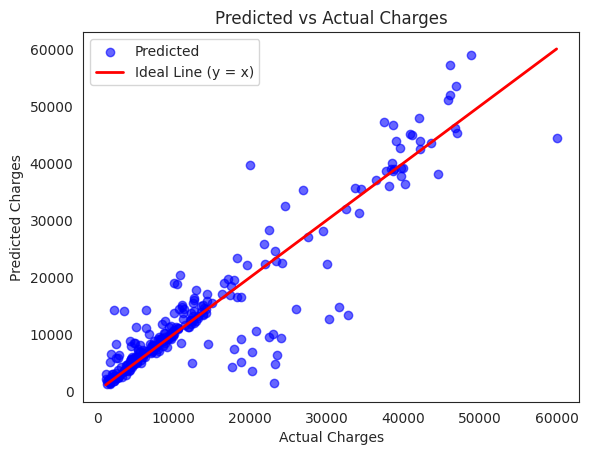

In [74]:
import matplotlib.pyplot as plt

# Plot actual vs predicted charges
plt.scatter(y_test_original, y_pred_original, color='blue', label='Predicted', alpha=0.6)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', lw=2, label='Ideal Line (y = x)')

# Add labels and title
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted vs Actual Charges')
plt.legend()

plt.show()


In [75]:
import pickle

# Save the trained model
with open('model_pipeline.pkl', 'wb') as file:
    pickle.dump(model_pipeline, file)

print("Model saved successfully!")


Model saved successfully!


In [76]:
!pip install streamlit pyngrok


In [77]:
print(model_pipeline.steps)

[('preprocessor', ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['age', 'bmi', 'children']),
                                ('cat', OneHotEncoder(), ['smoker', 'region'])])), ('regressor', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...))]


In [78]:
# Import necessary libraries
import streamlit as st  # Streamlit is used to build the web app interface
import pandas as pd  # Pandas for data manipulation
import numpy as np  # NumPy for numerical operations
import pickle  # Used for loading the pre-trained model
from sklearn.preprocessing import StandardScaler  # For scaling numerical features (though it's not used directly here)
from sklearn.preprocessing import OneHotEncoder  # For encoding categorical features (though it's not used directly here)
from sklearn.compose import ColumnTransformer  # For preprocessing the data (though it's not used directly here)

# Step 1: Load the pre-trained model
# The trained pipeline model is stored as 'model_pipeline.pkl'. This model includes preprocessing steps and a regressor.
with open('model_pipeline.pkl', 'rb') as file:
    model_pipeline = pickle.load(file)  # Load the pickled model into the variable model_pipeline

# Step 2: Streamlit app setup
st.title("Insurance Charges Estimator")  # Title of the app

# Step 3: Collect user input through Streamlit widgets
# These widgets allow the user to input values which will be used for prediction
age = st.number_input("Enter your age:", min_value=18, max_value=100, value=25, step=1)  # Age input
bmi = st.number_input("Enter your BMI:", min_value=10.0, max_value=50.0, value=25.0, step=0.1)  # BMI input
children = st.number_input("Enter the number of children:", min_value=0, max_value=10, value=0, step=1)  # Number of children input
smoker = st.selectbox("Are you a smoker?", options=['yes', 'no'])  # Smoker status input
region = st.selectbox("Select your region:", options=['northeast', 'northwest', 'southeast', 'southwest'])  # Region selection input

# Step 4: Create input data for prediction
# This DataFrame is constructed with the user inputs collected from Streamlit widgets.
input_data = pd.DataFrame({
    'age': [age],  # Age input
    'bmi': [bmi],  # BMI input
    'children': [children],  # Number of children input
    'smoker': [smoker],  # Smoker status input
    'region': [region]  # Region input
})

# Step 5: Make prediction using the loaded model
# The model will predict the log-transformed charges based on the input data
predicted_log_charges = model_pipeline.predict(input_data)
print("predicted_log_charges-", predicted_log_charges)  # Print the predicted log charges for debugging purposes

# Step 6: Reverse the log transformation
# The model was trained on log-transformed target values, so we reverse the log transformation
# to get the predicted charges in the original scale (since the model outputs the log of charges).
predicted_charges = np.exp(predicted_log_charges)  # Reverse the log transformation using the exponential function
print("predicted_charges", predicted_charges)  # Print the predicted charges for debugging purposes

# Step 7: Display the predicted charges in the Streamlit app
# Display the predicted charges as a formatted string on the web app
st.write(f"Estimated Charges: ${predicted_charges[0]:.2f}")  # Display the estimated insurance charges with 2 decimal places


2024-12-18 21:21:27.477 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 21:21:27.864 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-18 21:21:27.866 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 21:21:27.870 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 21:21:27.872 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 21:21:27.875 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 21:21:27.877 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 21:21:27.878 Session state does not 

predicted_log_charges- [9.788509]
predicted_charges [17827.71]


In [82]:
!ngrok config add-authtoken 2qOsE2suv45cjfFKUnlp3D3q0BN_2NXmksVNLoEpQ5QMN8XYY

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [83]:
from pyngrok import ngrok

# Kill any previous tunnels
ngrok.kill()

# Start the Streamlit app
!streamlit run app.py &>/content/logs.txt &

# Create a public URL for the Streamlit app (use addr instead of port)
url = ngrok.connect(addr="8501", proto="http")
print(f"Streamlit app is running at: {url}")


Streamlit app is running at: NgrokTunnel: "https://f29a-35-194-189-20.ngrok-free.app" -> "http://localhost:8501"
